Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#Загрузите файл HR.csv в pandas dataframe 
df = pd.read_csv('HR.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
# Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df['satisfaction_level']

0        0.38
1        0.80
2        0.11
3        0.72
4        0.37
         ... 
14994    0.40
14995    0.37
14996    0.37
14997    0.11
14998    0.37
Name: satisfaction_level, Length: 14999, dtype: float64

In [5]:
# считаем моду по уровню удовлетворенности (округление до десятых)
# Создаём пустой словарь, в котором будем считать количество появлений значений по параметру
satisfaction_level_counts = {}
for i in df.satisfaction_level.round(1):
    if i not in satisfaction_level_counts:
        satisfaction_level_counts[i] = 1
    else:
        satisfaction_level_counts[i] += 1
        
# Проходимся по словарю и ищем максимальное количество повторений
maxi = 0
mode_satisfaction_level = None
for k, v in satisfaction_level_counts.items():
      if maxi < v:
            maxi = v
            mode_satisfaction_level = k
print('Значение моды по параметру уровень удовлетворенности:', mode_satisfaction_level, 'Количество встречаемости:', maxi)

Значение моды по параметру уровень удовлетворенности: 0.8 Количество встречаемости: 2541


In [6]:
df['last_evaluation']

0        0.53
1        0.86
2        0.88
3        0.87
4        0.52
         ... 
14994    0.57
14995    0.48
14996    0.53
14997    0.96
14998    0.52
Name: last_evaluation, Length: 14999, dtype: float64

In [7]:
# считаем моду по времени  с момента последней оценки в годах (округление до десятых)
# Создаём пустой словарь, в котором будем считать количество появлений значений по параметру
last_evaluation_counts = {}
for i in df.last_evaluation.round(1):
    if i not in last_evaluation_counts:
        last_evaluation_counts[i] = 1
    else:
        last_evaluation_counts[i] += 1
        
# Проходимся по словарю и ищем максимальное количество повторений
maxi = 0
mode_last_evaluation = None
for k, v in last_evaluation_counts.items():
      if maxi < v:
            maxi = v
            mode_last_evaluation = k
print('Значение моды по параметру "время с момента последней оценки в годах":', mode_last_evaluation, 'Количество встречаемости:', maxi)

Значение моды по параметру "время с момента последней оценки в годах": 0.6 Количество встречаемости: 2853


In [8]:
# считаем моду по количеству проектов, выполненных за время работы

number_project_counts = {}
for i in df.number_project:
    if i not in number_project_counts:
        number_project_counts[i] = 1
    else:
        number_project_counts[i] += 1
        
maxi = 0
mode_number_project = None
for k, v in number_project_counts.items():
      if maxi < v:
            maxi = v
            mode_number_project = k
print('Значение моды по количеству проектов, выполненных за время работы:', mode_number_project, 'Количество встречаемости:', maxi)

Значение моды по количеству проектов, выполненных за время работы: 4 Количество встречаемости: 4365


In [9]:
# считаем моду по среднему количеству часов на рабочем месте (округляем до целых)
average_montly_hours_counts = {}
for i in df.average_montly_hours.round():
    if i not in average_montly_hours_counts:
        average_montly_hours_counts[i] = 1
    else:
        average_montly_hours_counts[i] += 1
        
maxi = 0
mode_average_montly_hours = None
for k, v in average_montly_hours_counts.items():
      if maxi < v:
            maxi = v
            mode_average_montly_hours = k
print('Значение моды по среднему количеству часов на рабочем месте:', mode_average_montly_hours, 'Количество встречаемости:', maxi)

Значение моды по среднему количеству часов на рабочем месте: 135 Количество встречаемости: 153


In [10]:
# считаем моду по стажу работы в компании в годах (округляем до целых)
time_spend_company_counts = {}
for i in df.time_spend_company.round():
    if i not in time_spend_company_counts:
        time_spend_company_counts[i] = 1
    else:
        time_spend_company_counts[i] += 1
maxi = 0
mode_time_spend_company = None
for k, v in time_spend_company_counts.items():
      if maxi < v:
            maxi = v
            mode_time_spend_company = k
print('Значение моды по стажу работы в компании в годах:', mode_time_spend_company, 'Количество встречаемости:', maxi)

Значение моды по стажу работы в компании в годах: 3 Количество встречаемости: 6443


In [11]:
df['salary']

0           low
1        medium
2        medium
3           low
4           low
          ...  
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 14999, dtype: object

In [12]:
# считаем моду по относитеьному уровню заработной платы
salary_counts = {}
for i in df.salary:
    if i not in salary_counts:
        salary_counts[i] = 1
    else:
        salary_counts[i] += 1
        
maxi = 0
mode_salary = None
for k, v in salary_counts.items():
      if maxi < v:
            maxi = v
            salary_company = k
print('Значение моды:', salary_company, 'Количество встречаемости:', maxi)

Значение моды: low Количество встречаемости: 7316


In [ ]:
#Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
#Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [16]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


### Максимальные уровень корреляции у параметров: 
    1. "количество проектов за время работы" и "Среднее количество часов на рабочем месте в месяц"¶
    2. "уровень удовлетворенности" и "уход из компании" 
    В целом, высокого уровня корреляции нет. Скорее мы можем говорить о слабо выраженной коррекляции, так как уровнь ниже 0,5 по модулю
### Наименьший уровень корреляции у параметров:
    1. "инциденты" и "количество проектов"
    2."повышение " и "Среднее количество часов на рабочем месте в месяц"
    3. "продвижение" и "количество проектов"
    4."инциденьы" и "время последней оценки"
    5. "повышения" и "время последней оценки"...
     и другие.В целом, много параметров с очень слабой корреляцией (уровнем ниже, чем 0,2)
     
     

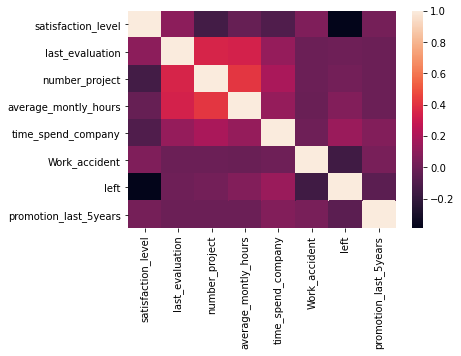

In [17]:
#Дополнительно можно визуализировать через тепловую карту,но  1й вариант мне субъкективно более удобен.

sns.heatmap(df.corr())

In [18]:
# Рассчитайте сколько сотрудников работает в каждом департаменте.
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [19]:
#Показать распределение сотрудников по зарплатам. 
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [20]:
#Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
df.groupby(['department', 'salary']).agg({'salary':['count']})

salary
                    count
department  salary       
IT          high       83
            low       609
            medium    535
RandD       high       51
            low       364
            medium    372
accounting  high       74
            low       358
            medium    335
hr          high       45
            low       335
            medium    359
management  high      225
            low       180
            medium    225
marketing   high       80
            low       402
            medium    376
product_mng high       68
            low       451
            medium    383
sales       high      269
            low      2099
            medium   1772
support     high      141
            low      1146
            medium    942
technical   high      201
            low      1372
            medium   1147

In [48]:
# Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
# Посмотрим на ситуацию в целом

df.groupby(['salary']).agg({'average_montly_hours':['mean']})

,average_montly_hours
,mean
salary,
high,199.867421
low,200.996583
medium,201.338349


In [24]:
# Посмотрим на распределение в разных отделах организации
df.groupby(['department', 'salary']).agg({'average_montly_hours':['mean']})

average_montly_hours
                                   mean
department  salary                     
IT          high             194.927711
            low              201.382594
            medium           204.295327
RandD       high             199.745098
            low              198.747253
            medium           202.954301
accounting  high             205.905405
            low              199.899441
            medium           201.465672
hr          high             209.066667
            low              202.456716
            medium           193.863510
management  high             200.248889
            low              200.744444
            medium           202.653333
marketing   high             185.575000
            low              204.487562
            medium           196.869681
product_mng high             194.632353
            low              201.048780
            medium           199.637076
sales       high             201.178439
            low              200.363030
            medium           201.520316
support     high             203.985816
            low              198.900524
            medium           202.535032
technical   high             200.044776
            low              203.064869
            medium           202.248474

# ## Сотрудники только трех отделов (accounting, hr, support) с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом


In [34]:
data = df[['department','salary','average_montly_hours']]

<BarContainer object of 14999 artists>

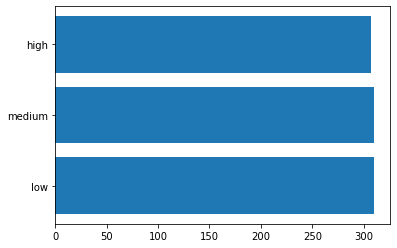

In [45]:
#дополнительно визуализируем данные
plt.barh(data['salary'], data['average_montly_hours'])

In [ ]:
# Сотрудники с разным уровнем дохода в среднем работают одинаковое количество часов

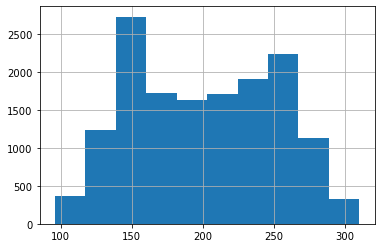

In [46]:
# Дополнительно посмотрим на гистограмму по распределению рабочего времени

data.average_montly_hours.hist()

In [49]:
# Мы помним, что 50% = 200, оценим, сотрудники с какими окладами работают по времени выше, чем 50%
data2 = data[data['average_montly_hours'] > 200]
data2.sort_values(by = 'average_montly_hours',ascending = False).head(30)

,department,salary,average_montly_hours
1228,marketing,low,310
1059,product_mng,low,310
1936,accounting,medium,310
14777,hr,low,310
1578,support,low,310
1939,hr,medium,310
1545,sales,medium,310
1963,support,low,310
1985,sales,medium,310
809,support,medium,310


In [43]:
data2.groupby(['salary']).agg({'average_montly_hours':['mean']})

,average_montly_hours
,mean
salary,
high,241.090762
low,246.255543
medium,244.036000


### Если мы отдельно смотрим, сотрудники с какими зарплатами работают по времени выше, чем в среднем по организации, то также видим, что это сотрудники с разным уровнем дохода. Гипотеза, что "сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом" не подтверждается. Можем говорить, что это характерно для отдельных отделов внуnри компании (accounting, hr, support)

In [50]:
#Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
#● Доля сотрудников с повышением за последние 5 лет
#● Средняя степень удовлетворенности
#● Среднее количество проектов

In [60]:
# оставим таблицу только с уволившимися сотрудниками
data_left = df[df['left'] == 1]
data_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [61]:
data_left.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [67]:
print(f' Средняя степень удовлетворенности среди уволившихся сотрудников {data_left.satisfaction_level.mean()}')
print(f' Среднее количество проектов среди уволившихся сотрудников {data_left.number_project.mean()}')

 Средняя степень удовлетворенности среди уволившихся сотрудников 0.44009801176140917
 Среднее количество проектов среди уволившихся сотрудников 3.8555026603192384


In [84]:
#вычисляем долю сотрудников с повышением за последние 5 лет. Получаем 0,05%
pd.concat([data_left['promotion_last_5years'].value_counts(normalize=True)], axis=1)

,promotion_last_5years
0,0.994679
1,0.005321


In [68]:
# оставим таблицу только по оставшимся в компании сотрудникам
data_work = df[df['left'] == 0]
data_work.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [69]:
data_work.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


In [71]:
print(f' Средняя степень удовлетворенности среди работающих сотрудников {data_work.satisfaction_level.mean()}')
print(f' Среднее количество проектов среди работающих сотрудников {data_work.number_project.mean()}')

 Средняя степень удовлетворенности среди работающих сотрудников 0.666809590479516
 Среднее количество проектов среди работающих сотрудников 3.786664333216661


In [82]:
#вычисляем долю сотрудников с повышением за последние 5 лет. Получаем 2,6%
pd.concat([data_work['promotion_last_5years'].value_counts(normalize=True)], axis=1)

,promotion_last_5years
0,0.973749
1,0.026251


Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки


In [9]:
df_lda=df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]

In [10]:
df_lda.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [11]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df_lda, test_size=0.2)

In [25]:
y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']

In [27]:
data_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
9415,0.25,0.76,6,182,3,0,0
3001,0.66,0.75,5,227,3,1,0
12832,0.41,0.68,3,191,4,0,0
6177,0.72,0.58,4,255,2,0,0
12952,0.62,0.89,4,261,2,0,0
...,...,...,...,...,...,...,...
11119,0.19,0.36,3,167,5,0,0
2576,0.70,0.53,4,152,3,0,0
10446,0.93,0.55,3,134,3,1,0
2898,0.74,0.41,4,250,4,0,0


In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [30]:
lda.fit(data_train, y_train)
lda.predict(data_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T

In [33]:
result

,0,1
0,1,0
1,1,0
2,0,0
3,0,1
4,0,0
...,...,...
2995,0,0
2996,0,1
2997,0,0
2998,0,0


In [34]:
lda.coef_

array([[-4.41274544,  0.69257392, -0.23804932,  0.00455448,  0.23538463,
        -1.09884427, -1.09201674]])